In [124]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import ttest_ind

mortgage_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/MORTGAGE30US.csv"

In [5]:
mortgage_df = pd.read_csv(mortgage_data_path)

In [7]:
mortgage_df.dtypes

DATE             object
MORTGAGE30US    float64
dtype: object

In [9]:
mortgage_df["DATE"] = pd.to_datetime(mortgage_df["DATE"])

In [11]:
mortgage_df["YEAR"] = mortgage_df["DATE"].dt.year

In [14]:
average_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].mean().reset_index()
median_mortgage_by_year = mortgage_df.groupby("YEAR")["MORTGAGE30US"].median().reset_index()

average_mortgage_by_year.rename(columns={"MORTGAGE30US": "Average Mortgage"}, inplace=True)
median_mortgage_by_year.rename(columns={'MORTGAGE30US': 'Median Mortgage'}, inplace=True)

average_mortgage_by_year.rename(columns={"YEAR": "Year"}, inplace=True)
median_mortgage_by_year.rename(columns={'YEAR': 'Year'}, inplace=True)

average_mortgage_by_year.head()

,Year,Average Mortgage
0,1971,7.541750
1,1972,7.383269
2,1973,8.044808
3,1974,9.187115
4,1975,9.047115


In [17]:
education_data_path = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Years of School Completed by People 25 Years and Over.csv"

education_df = pd.read_csv(education_data_path)

education_df.dtypes

Year                           int64
Total                         object
0 to 4 years (Elementary)     object
5 to 8 years (Elementary)     object
1 to 3 years (High School)    object
4 years (High School)         object
1 to 3 years (College)        object
4 years or more (College)     object
dtype: object

In [19]:
for column in education_df.columns:
    education_df[column] = education_df[column].astype(str).str.replace(",", "").astype(float)

education_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,2203.0,5732.0,11998.0,64465.0,56659.0,85217.0
1,2021.0,224580.0,2074.0,5862.0,12118.0,62547.0,56942.0,85037.0
2,2020.0,223058.0,2106.0,5788.0,12313.0,61597.0,57552.0,83701.0
3,2019.0,221478.0,2181.0,6422.0,13372.0,62259.0,57428.0,79816.0
4,2018.0,219830.0,2129.0,6600.0,13682.0,62685.0,57810.0,76924.0


In [21]:
education_percentage_df = education_df.copy()

In [23]:
for column in education_percentage_df.columns[2:]:
    education_percentage_df[column] = education_percentage_df[column] / education_percentage_df["Total"] * 100

education_percentage_df.head()

,Year,Total,0 to 4 years (Elementary),5 to 8 years (Elementary),1 to 3 years (High School),4 years (High School),1 to 3 years (College),4 years or more (College)
0,2022.0,226274.0,0.973598,2.533212,5.302421,28.489796,25.039996,37.660977
1,2021.0,224580.0,0.923502,2.610206,5.395850,27.850655,25.354885,37.864903
2,2020.0,223058.0,0.944149,2.594841,5.520089,27.614791,25.801361,37.524321
3,2019.0,221478.0,0.984748,2.899611,6.037620,28.110693,25.929438,36.037891
4,2018.0,219830.0,0.968476,3.002320,6.223900,28.515216,26.297594,34.992494


In [25]:
homes_data = "/Users/ylsstudent/Documents/Data_Analytics_Bootcamp/Projects/BootCampProject1/resources/Number_Houses_Sold.csv"

In [29]:
homes_df = pd.read_csv(homes_data)
homes_df.dtypes

Year           float64
Total (USA)     object
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

In [95]:
homes_df

,Year,Total (USA),Northeast,MidWest,South,West
0,1963.0,560.0,87.0,134.0,199.0,141.0
1,1964.0,565.0,90.0,146.0,200.0,129.0
2,1965.0,575.0,94.0,142.0,210.0,129.0
3,1966.0,461.0,84.0,113.0,166.0,99.0
4,1967.0,487.0,77.0,112.0,179.0,119.0
...,...,...,...,...,...,...
59,2022.0,641.0,33.0,66.0,392.0,150.0
60,2023.0,668.0,34.0,68.0,413.0,153.0
61,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
for column in homes_df.columns:
    homes_df[column] = homes_df[column].astype(str).str.replace(",", "").astype(float)
homes_df.dtypes

Year           float64
Total (USA)    float64
Northeast      float64
MidWest        float64
South          float64
West           float64
dtype: object

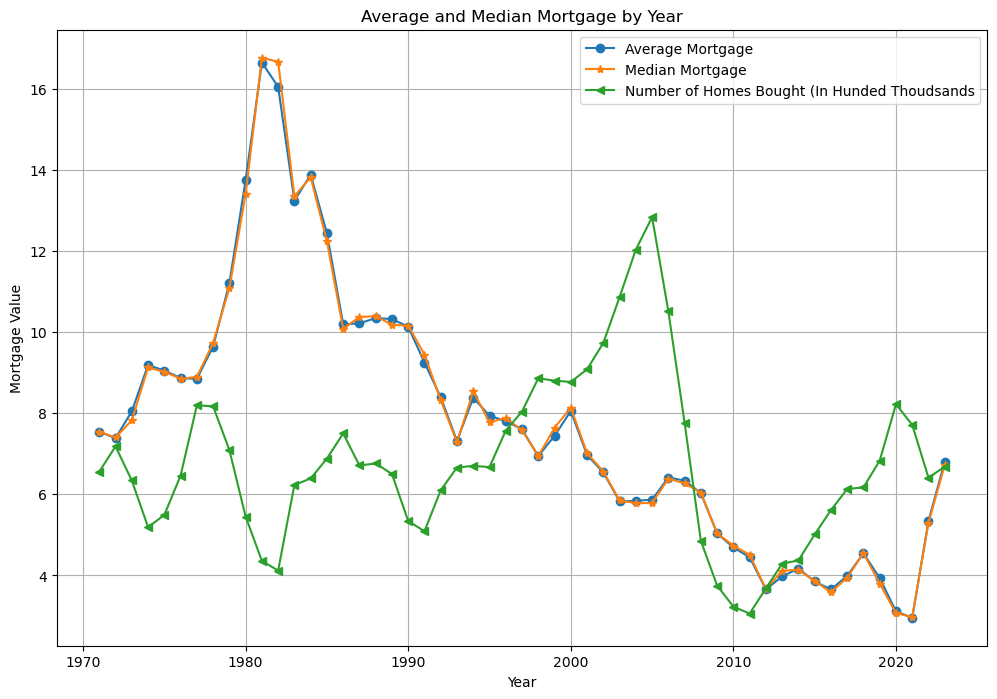

In [69]:
med_avg_merged = pd.merge(average_mortgage_by_year, median_mortgage_by_year, on='Year')
med_avg_merged = pd.merge(med_avg_merged, homes_df, on='Year')


plt.figure(figsize=(12, 8))
plt.plot(med_avg_merged["Year"], med_avg_merged["Average Mortgage"], marker="o", label="Average Mortgage")
plt.plot(med_avg_merged["Year"], med_avg_merged["Median Mortgage"], marker="*", label="Median Mortgage")
plt.plot(med_avg_merged["Year"], med_avg_merged["Total (USA)"]/100, marker="<", label="Number of Homes Bought (In Hunded Thoudsands")
plt.xlabel('Year')
plt.ylabel('Mortgage Value')
plt.title('Average and Median Mortgage by Year')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
homes_mortgage_merge = pd.merge(average_mortgage_by_year, homes_df, on="Year")

corr_mort_homes = homes_mortgage_merge[["Average Mortgage", "Total (USA)"]].corr()

In [93]:
corr_mort_homes **2

,Average Mortgage,Total (USA)
Average Mortgage,1.000000,0.009014
Total (USA),0.009014,1.000000


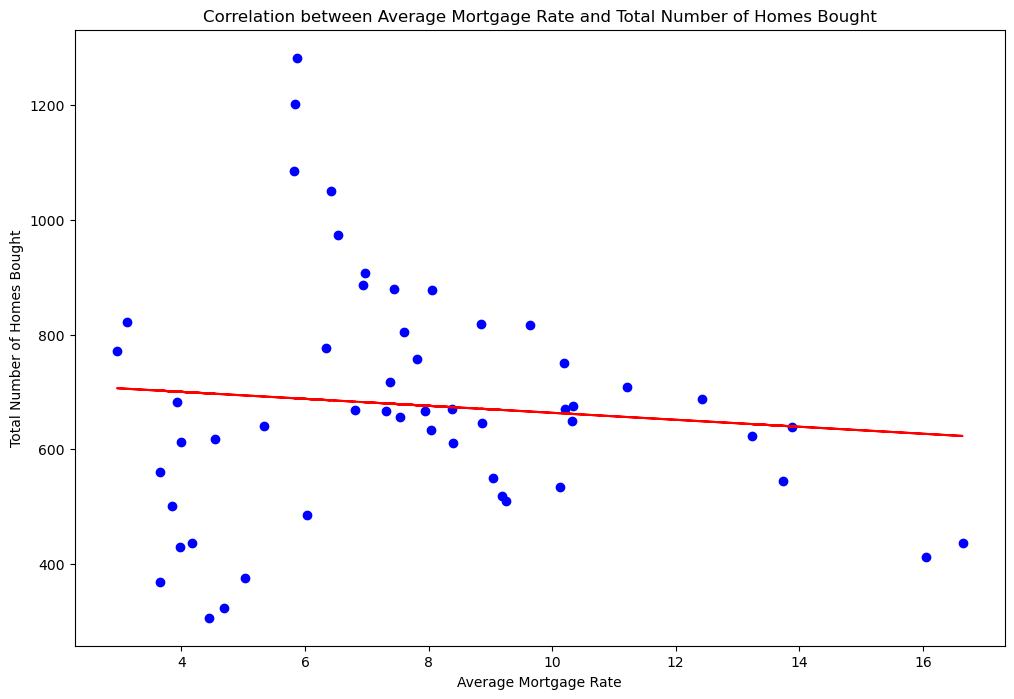

In [81]:
x = homes_mortgage_merge["Average Mortgage"]
y = homes_mortgage_merge["Total (USA)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue')
plt.plot(x, slope * x + intercept, color = "red")
plt.title("Correlation between Average Mortgage Rate and Total Number of Homes Bought")
plt.xlabel("Average Mortgage Rate")
plt.ylabel("Total Number of Homes Bought")

# Show the plot
plt.show()

In [111]:
education_homes_df = pd.merge(education_df, homes_df, on='Year')

ed_corr1 = education_homes_df[['0 to 4 years (Elementary)','Total (USA)']].corr()
ed_corr2 = education_homes_df[['5 to 8 years (Elementary)','Total (USA)']].corr()
ed_corr3 = education_homes_df[['1 to 3 years (High School)','Total (USA)']].corr()
ed_corr4 = education_homes_df[['4 years (High School)','Total (USA)']].corr()
ed_corr5 = education_homes_df[['1 to 3 years (College)','Total (USA)']].corr()
ed_corr6 = education_homes_df[['4 years or more (College)','Total (USA)']].corr()

ed_corr1_squared = ed_corr1 ** 2
ed_corr2_squared = ed_corr2 ** 2
ed_corr3_squared = ed_corr3 ** 2
ed_corr4_squared = ed_corr4 ** 2
ed_corr5_squared = ed_corr5 ** 2
ed_corr6_squared = ed_corr6 ** 2

(ed_corr1_squared, ed_corr2_squared, ed_corr3_squared, ed_corr4_squared, ed_corr5_squared, ed_corr6_squared)

(                           0 to 4 years (Elementary)  Total (USA)
 0 to 4 years (Elementary)                   1.000000     0.065425
 Total (USA)                                 0.065425     1.000000,
                            5 to 8 years (Elementary)  Total (USA)
 5 to 8 years (Elementary)                   1.000000     0.060936
 Total (USA)                                 0.060936     1.000000,
                             1 to 3 years (High School)  Total (USA)
 1 to 3 years (High School)                    1.000000     0.005885
 Total (USA)                                   0.005885     1.000000,
                        4 years (High School)  Total (USA)
 4 years (High School)               1.000000     0.044179
 Total (USA)                         0.044179     1.000000,
                         1 to 3 years (College)  Total (USA)
 1 to 3 years (College)                1.000000     0.038393
 Total (USA)                           0.038393     1.000000,
                          

In [126]:
before_2010 = homes_df[homes_df["Year"] < 2010]["Total (USA)"]
after_2010 = homes_df[homes_df["Year"] >= 2010]["Total (USA)"]

t_stat, p_value = ttest_ind(before_2010, after_2010)

t_stat, p_value


(2.2295622616388195, 0.029596047870472802)

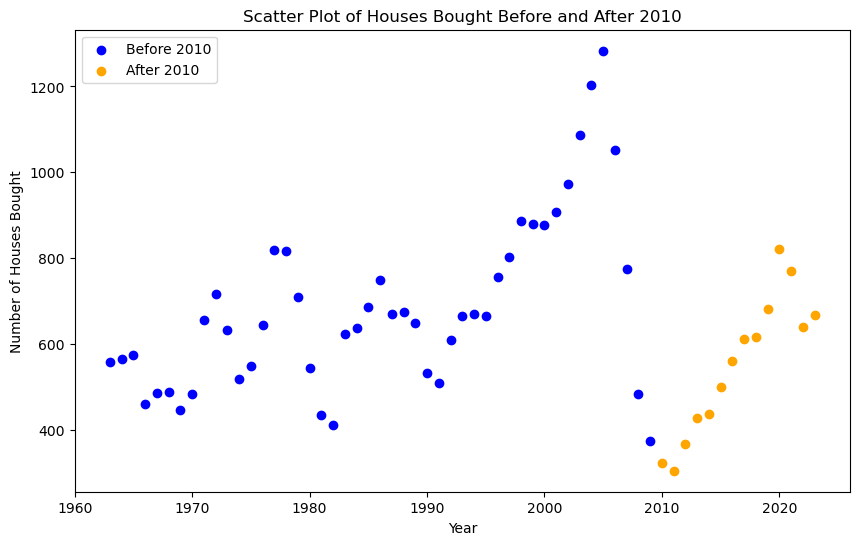

In [146]:
# Scatter plot
plt.figure(figsize=(10, 6))

x_before = homes_df[homes_df["Year"] < 2010]["Year"]
y_before = before_2010

x_after = homes_df[homes_df["Year"] >= 2010]["Year"]
y_after = after_2010

plt.scatter(x_before, y_before, color='blue', label='Before 2010')

plt.scatter(x_after, y_after, color='orange', label='After 2010')

plt.xlabel('Year')
plt.ylabel('Number of Houses Bought')
plt.title('Scatter Plot of Houses Bought Before and After 2010')
plt.legend(loc='upper left')
plt.show()